In [316]:
import pandas as pd
import numpy as np

In [375]:
df = pd.read_csv("amazon_baby.csv")
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [376]:
len(df)

183531

In [377]:
df['name'].value_counts()

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
                                                                           ... 
Mud Pie Baby Stroller Bear Buddy (Set of 4)                                   1
Baby Mod Modena 3 in 1 Convertible Crib, White                                1
Britax Kick Mats                                                              1
Camouflage Camo print Cloth Diaper                                            1
Baby Gear Blue Bear with Dots and Circles Security Blanket Lovey              1
Name: name, Length: 32415, dtype: int64

In [378]:
df = df[df.groupby("name")["name"].transform('size') > 20]

In [379]:
len(df)

89691

In [380]:
df= df.head(10000)

In [381]:
df.head()

,name,review,rating
153,Fisher Price Nesting Action Vehicles,We bought these for our son when he turned two...,5
154,Fisher Price Nesting Action Vehicles,"My son loves stacking cups, so a friend recomm...",5
155,Fisher Price Nesting Action Vehicles,My son Cameron just loves these great little s...,5
156,Fisher Price Nesting Action Vehicles,My one year old son received these as a birthd...,5
157,Fisher Price Nesting Action Vehicles,I purchased this toy for my great grandson\'s ...,5


In [382]:
df['review'] = df['review'].astype(str)

In [386]:
df = df[~df["review"].isnull()]
len(df)

10000

In [387]:
def clean(txt):
    txt = txt.str.replace("(<br/>)", "")
    txt = txt.str.replace('(<a).*(>).*(</a>)', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', ' ')  
    return txt

In [388]:
df['review'] = clean(df['review'])

In [389]:
from textblob import TextBlob, Word, Blobber
#df['polarity'] = df['review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['review'].astype(str).apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

In [390]:
df.head()

,name,review,rating,review_len,word_count
153,Fisher Price Nesting Action Vehicles,We bought these for our son when he turned two...,5,314,59
154,Fisher Price Nesting Action Vehicles,"My son loves stacking cups, so a friend recomm...",5,211,41
155,Fisher Price Nesting Action Vehicles,My son Cameron just loves these great little s...,5,436,80
156,Fisher Price Nesting Action Vehicles,My one year old son received these as a birthd...,5,373,65
157,Fisher Price Nesting Action Vehicles,I purchased this toy for my great grandson\'s ...,5,328,63


In [391]:
df['rating'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [392]:
from nltk.corpus import stopwords

In [420]:
df['review1'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review1'].head()

153    we bought these for our son when he turned two...
154    my son loves stacking cups, so a friend recomm...
155    my son cameron just loves these great little s...
156    my one year old son received these as a birthd...
157    i purchased this toy for my great grandson\'s ...
Name: review1, dtype: object

In [421]:
#Removing punctuation
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

153    we bought these for our son when he turned two...
154    my son loves stacking cups so a friend recomme...
155    my son cameron just loves these great little s...
156    my one year old son received these as a birthd...
157    i purchased this toy for my great grandsons fi...
Name: review1, dtype: object

In [422]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [423]:
stop = stopwords.words('english')

In [424]:
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review1'].head()

153    bought son turned two seen playmates home love...
154    son loves stacking cups friend recommended toy...
155    son cameron loves great little stacking cars e...
156    one year old son received birthday gift loves ...
157    purchased toy great grandsons first christmas ...
Name: review1, dtype: object

In [425]:
df['polarity'] = df['review1'].map(lambda text: TextBlob(text).sentiment.polarity)

In [426]:
freq = pd.Series(' '.join(df['review1']).split()).value_counts()[:20]
freq

one        4939
baby       4822
use        4108
would      3706
great      3345
get        3007
like       2659
time       2649
easy       2641
old        2518
bottles    2358
son        2351
months     2289
also       2242
little     2236
product    2215
seat       2203
bought     2171
tub        2171
dont       2110
dtype: int64

In [427]:
freq_word = list(freq.index)
df['review2'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_word))

In [428]:
freq = pd.Series(' '.join(df['review1']).split()).value_counts()

In [429]:
less_freq = list(freq[freq ==1].index)
less_freq

['djgs',
 'now7monthold',
 'joseph',
 'area8',
 'activing',
 'tea',
 'productdespite',
 'worth3the',
 'aroundand',
 '80lb',
 'combinedit',
 'hikesnow',
 'bubblesbeing',
 'cheast',
 'inexcusable',
 'heavyeven',
 'suasage',
 'loudsoft',
 'babyborjn',
 '3ozs',
 'longlike',
 'duet',
 'reviewersbaaaaad',
 'considerations1',
 'stringy',
 '3monthsi',
 'whomever',
 'coliceven',
 'bets',
 'nicelycon',
 'beeps',
 'qucik',
 'surpassed',
 'thisproblem',
 'onlookers',
 'perfective',
 'viewer',
 'finemy',
 'wlaundry',
 'wiered',
 'outdown',
 'unwieldy',
 'satisfactorily',
 'fisherprices',
 'loft',
 'registryfor',
 'cupeasy',
 'bicycling',
 'hurtful',
 'sizealmost',
 'everythingit',
 'backand',
 'warmhot',
 'armful',
 'tooenjoy',
 'groggy',
 'legbutt',
 'rangif',
 'coastwe',
 'workthe',
 'worring',
 'seathrmim',
 'deeperbesides',
 'intervention',
 'sleepwhen',
 '03mosbut',
 'isbecause',
 'sampling',
 'bottombig',
 'starve',
 'scuffs',
 'bottleso',
 'smellexcuse',
 'amphibian',
 'formulai',
 'therewe'

In [403]:
len(less_freq)

14352

In [404]:
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

In [436]:
df['review1'] = df['review1'].apply(lambda x: str(TextBlob(x).correct()))

In [437]:
df['review1'].head()

153    He bought these for our son when he turn two H...
154    By son love stick cups so a friend recommend t...
155    By son cameron just love these great little st...
156    By one year old son receive these a a birthday...
157    I purchase the toy for my great grandson first...
Name: review1, dtype: object

In [438]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['review1'] = df['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [439]:
df['review1'].head()

153    We bought these for our son when he turn two. ...
154    My son love stack cups, so a friend recommend ...
155    My son cameron just love these great littl sta...
156    My one year old son receiv these as a birthday...
157    I purchas thi toy for my great grandson\' firs...
Name: review1, dtype: object

In [440]:
df['review1'] = df['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['review1'].head()

153    We bought these for our son when he turn two. ...
154    My son love stack cups, so a friend recommend ...
155    My son cameron just love these great littl sta...
156    My one year old son receiv these a a birthday ...
157    I purchas thi toy for my great grandson\' firs...
Name: review1, dtype: object

In [441]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

153    We bought these for our son when he turn two H...
154    My son love stack cups so a friend recommend t...
155    My son cameron just love these great littl sta...
156    My one year old son receiv these a a birthday ...
157    I purchas thi toy for my great grandson first ...
Name: review1, dtype: object

In [446]:
df['polarity'] = df['review1'].map(lambda text: TextBlob(text).sentiment.polarity)

In [448]:
df = df.drop(columns=['review2'])

In [449]:
df.head()

,name,review,rating,review_len,word_count,review1,polarity
153,Fisher Price Nesting Action Vehicles,We bought these for our son when he turned two...,5,314,59,We bought these for our son when he turn two H...,0.187500
154,Fisher Price Nesting Action Vehicles,"My son loves stacking cups, so a friend recomm...",5,211,41,My son love stack cups so a friend recommend t...,0.445833
155,Fisher Price Nesting Action Vehicles,My son Cameron just loves these great little s...,5,436,80,My son cameron just love these great littl sta...,0.378889
156,Fisher Price Nesting Action Vehicles,My one year old son received these as a birthd...,5,373,65,My one year old son receiv these a a birthday ...,0.306250
157,Fisher Price Nesting Action Vehicles,I purchased this toy for my great grandson\'s ...,5,328,63,I purchas thi toy for my great grandson first ...,0.428571


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

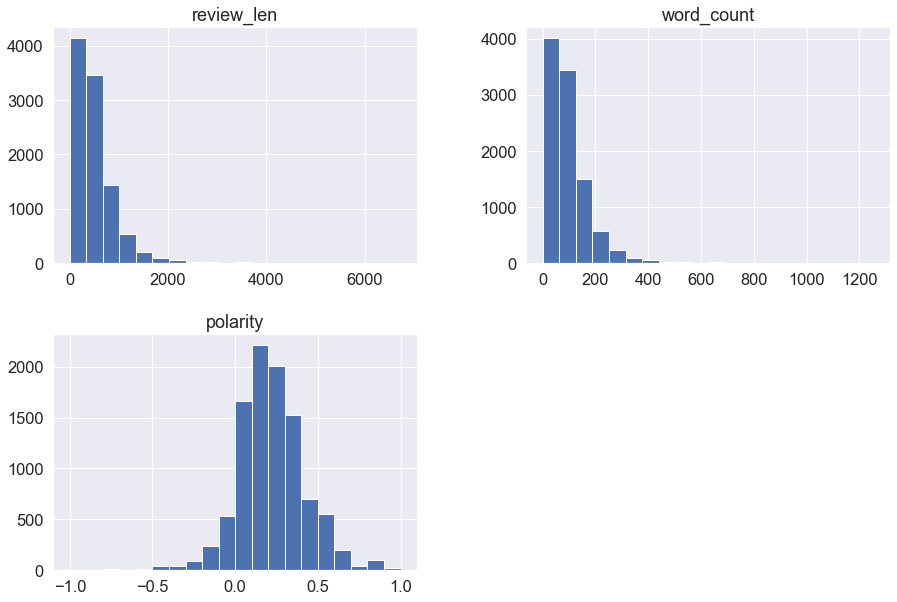

In [452]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [282]:
good_products = list(df[df['rating'] >3]['name'].unique())

In [285]:
len(list(df['name'].value_counts()))

162

In [475]:
mean_pol = df.groupby('rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
mean_pol

,mean_polarity
rating,
1,0.064792
2,0.128230
3,0.165925
4,0.213836
5,0.273739


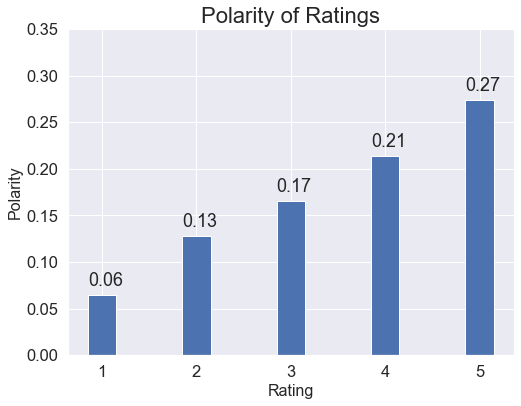

In [478]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)

#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))

plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()


In [500]:
product_pol = df.groupby('name')['polarity'].agg([np.mean])
product_pol.columns = ['polarity']
product_pol = product_pol.sort_values('polarity', ascending=False)
#product_pol.reset_index(inplace=True)
product_pol = product_pol.head(20)
product_pol

,polarity
name,
Philips AVENT BPA Free Classic Bottle Sealing Discs,0.363286
Fisher Price Nesting Action Vehicles,0.332984
The First Years Hands Free Gate Extension,0.326110
Animal Planet\'s Big Tub of Dinosaurs,0.316930
FISHER PRICE SINGING STAR GYM,0.316776
Prince Lionheart Dresser Top Diaper Depot,0.316178
Philips Avent Electric Steam Sterilizer,0.314123
Munchkin White Hot Inflatable Duck Tub,0.313829
Boppy Luxe - Clouds,0.305759


In [481]:
df.head()

,name,review,rating,review_len,word_count,review1,polarity
153,Fisher Price Nesting Action Vehicles,We bought these for our son when he turned two...,5,314,59,We bought these for our son when he turn two H...,0.187500
154,Fisher Price Nesting Action Vehicles,"My son loves stacking cups, so a friend recomm...",5,211,41,My son love stack cups so a friend recommend t...,0.445833
155,Fisher Price Nesting Action Vehicles,My son Cameron just loves these great little s...,5,436,80,My son cameron just love these great littl sta...,0.378889
156,Fisher Price Nesting Action Vehicles,My one year old son received these as a birthd...,5,373,65,My one year old son receiv these a a birthday ...,0.306250
157,Fisher Price Nesting Action Vehicles,I purchased this toy for my great grandson\'s ...,5,328,63,I purchas thi toy for my great grandson first ...,0.428571


In [526]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(r for r in df.review1)
wordcl = WordCloud().generate(text)

In [535]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", 
                             "will", "even", "go", "realli", "didnt", "abl"])

In [533]:
#stopwords = ["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even"]

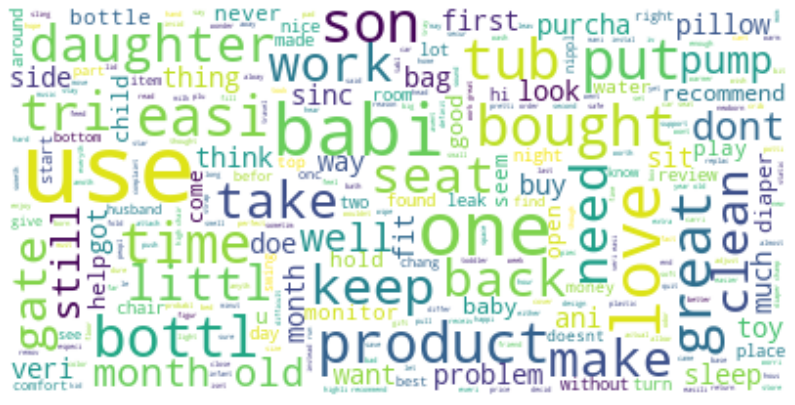

In [536]:
#stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
df.loc[(df.polarity ==0) & (df.rating == 3)]['rating'].values

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [443]:
tf1 = (df['review1']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

tf1.columns = ['words', 'tf']
tf1

,words,tf
0,them,2663.0
1,and,29607.0
2,some,1223.0
3,for,12997.0
4,of,12155.0
...,...,...
23042,26wk,1.0
23043,pleanti,1.0
23044,roomon,1.0
23045,backaches,1.0


In [444]:
for i, word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['review1'].str.contains(word)])))
tf1

,words,tf,idf
0,them,2663.0,1.748125
1,and,29607.0,0.117771
2,some,1223.0,1.595535
3,for,12997.0,0.329755
4,of,12155.0,0.469364
...,...,...,...
23042,26wk,1.0,9.210340
23043,pleanti,1.0,9.210340
23044,roomon,1.0,8.517193
23045,backaches,1.0,9.210340


In [445]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,them,2663.0,1.748125,4655.258026
1,and,29607.0,0.117771,3486.832251
2,some,1223.0,1.595535,1951.339314
3,for,12997.0,0.329755,4285.823771
4,of,12155.0,0.469364,5705.117402
...,...,...,...,...
23042,26wk,1.0,9.210340,9.210340
23043,pleanti,1.0,9.210340,9.210340
23044,roomon,1.0,8.517193,8.517193
23045,backaches,1.0,9.210340,9.210340


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [361]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['review1'], 20)
common_words

[('baby', 5805),
 ('one', 5398),
 ('use', 4108),
 ('bottle', 3912),
 ('would', 3706),
 ('get', 3524),
 ('great', 3345),
 ('month', 3334),
 ('time', 3264),
 ('love', 3262),
 ('like', 2963),
 ('easy', 2641),
 ('seat', 2565),
 ('son', 2555),
 ('old', 2555),
 ('product', 2436),
 ('diaper', 2425),
 ('tub', 2301),
 ('also', 2242),
 ('little', 2236)]

In [362]:
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,baby,5805
1,one,5398
2,use,4108
3,bottle,3912
4,would,3706


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

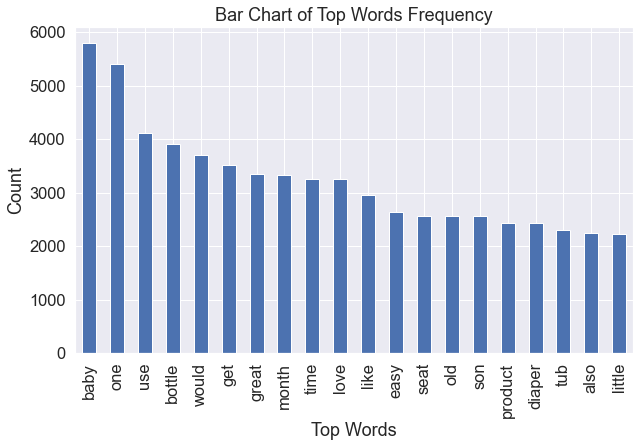

In [363]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [364]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [365]:
common_words2 = get_top_n_bigram(df['review1'], 30)
common_words2

[('month old', 1349),
 ('year old', 491),
 ('highly recommend', 464),
 ('easy clean', 462),
 ('easy use', 428),
 ('car seat', 398),
 ('would recommend', 377),
 ('diaper genie', 361),
 ('diaper champ', 343),
 ('work great', 336),
 ('high chair', 331),
 ('avent bottle', 290),
 ('little one', 280),
 ('work well', 277),
 ('dr brown', 256),
 ('first time', 245),
 ('diaper pail', 243),
 ('great product', 237),
 ('make sure', 237),
 ('much better', 236),
 ('booster seat', 202),
 ('every time', 198),
 ('week old', 196),
 ('waste money', 195),
 ('dont know', 194),
 ('old son', 183),
 ('really like', 174),
 ('put together', 173),
 ('worth money', 170),
 ('recommend product', 169)]

In [366]:
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,month old,1349
1,year old,491
2,highly recommend,464
3,easy clean,462
4,easy use,428


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

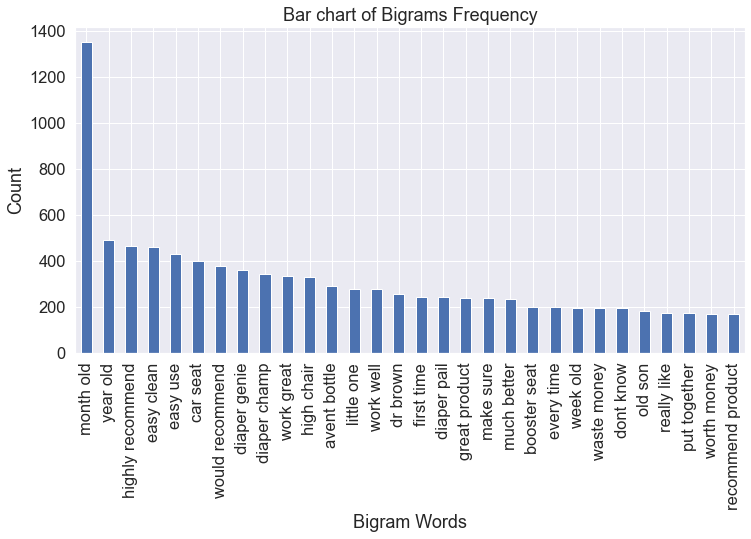

In [367]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

In [368]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [369]:
common_words3 = get_top_n_trigram(df['review1'], 30)

<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

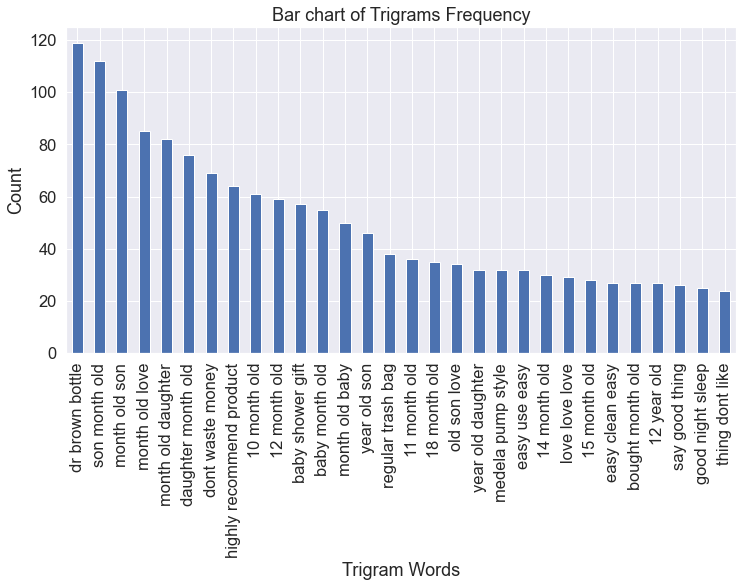

In [370]:
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

<AxesSubplot:title={'center':'Bar Chart of the Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

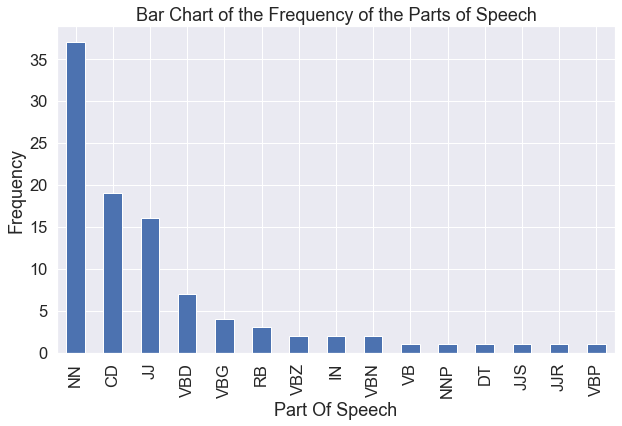

In [371]:
blob = TextBlob(str(df['review1']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])

pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

In [372]:
df.head()

,name,review,rating,review_len,word_count,review1,polarity,review2
153,Fisher Price Nesting Action Vehicles,We bought these for our son when he turned two...,5,314,59,bought son turned two seen home loved liked bc...,0.486667,turned two seen playmates home loved liked bc ...
154,Fisher Price Nesting Action Vehicles,"My son loves stacking cups, so a friend recomm...",5,211,41,son love stacking cup friend recommended toy s...,0.600000,loves stacking cups friend recommended toy lov...
155,Fisher Price Nesting Action Vehicles,My son Cameron just loves these great little s...,5,436,80,son love great little stacking car enjoys stac...,0.287500,cameron loves stacking cars enjoys stacking sl...
156,Fisher Price Nesting Action Vehicles,My one year old son received these as a birthd...,5,373,65,one year old son received birthday gift love s...,0.261000,year received birthday gift loves stackable he...
157,Fisher Price Nesting Action Vehicles,I purchased this toy for my great grandson\'s ...,5,328,63,purchased toy great grandson first christmas 6...,0.416667,purchased toy grandsons first christmas 6 cant...


In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\rashi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.1% of the points

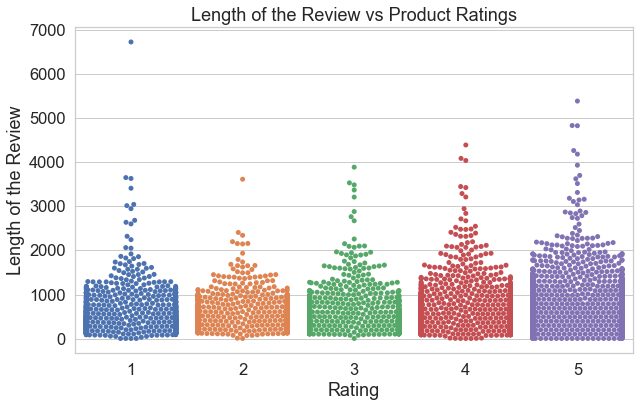

In [373]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.swarmplot(x='rating', y='review_len', data=df)
plt.xlabel("Rating")
plt.ylabel("Length of the Review")
plt.title("Length of the Review vs Product Ratings")
plt.show()

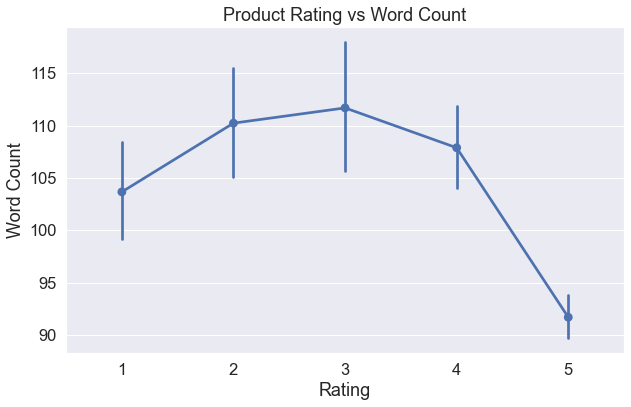

In [479]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "rating", y = "word_count", data = df)
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.title("Product Rating vs Word Count")
plt.show()

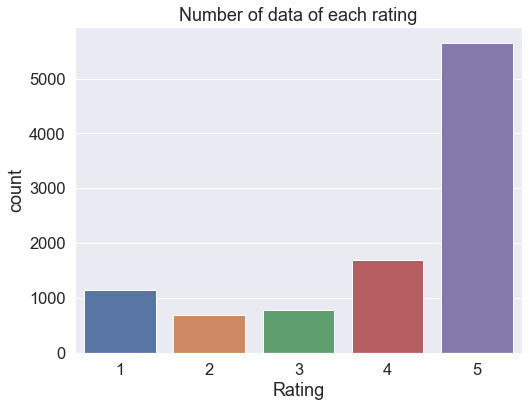

In [480]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

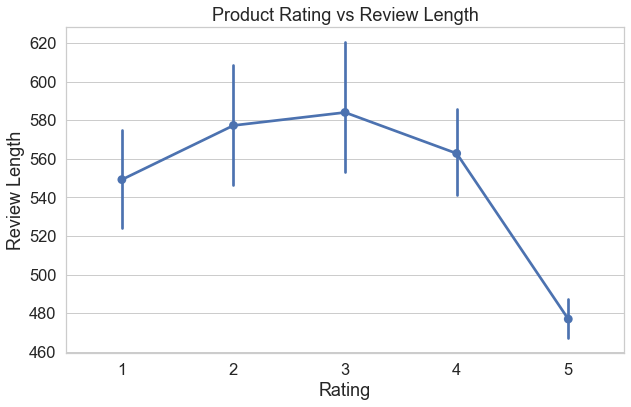

In [411]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "rating", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

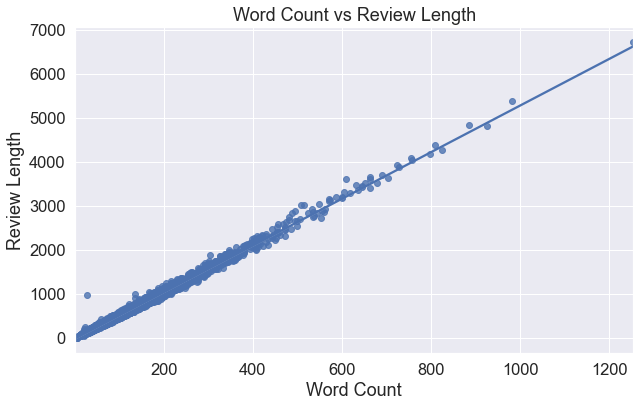

In [412]:
plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
sns.regplot(x = 'word_count', y = 'review_len', data = df)
plt.xlabel("Word Count")
plt.ylabel("Review Length")
plt.title("Word Count vs Review Length")
plt.show()

<Figure size 576x576 with 0 Axes>

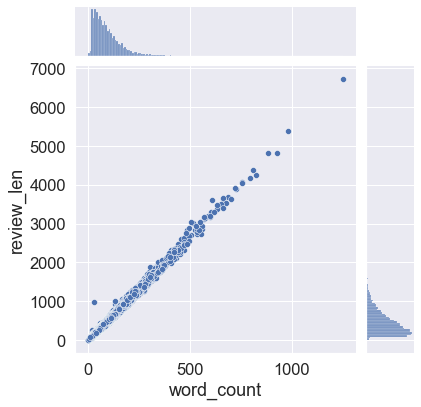

In [413]:
plt.figure(figsize = (8, 8))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sns.jointplot(x = 'word_count', y = 'review_len', data = df)
plt.xlabel("Word Count")
plt.ylabel("Review Length")
#plt.title("Word Count vs Review Length")
plt.show()

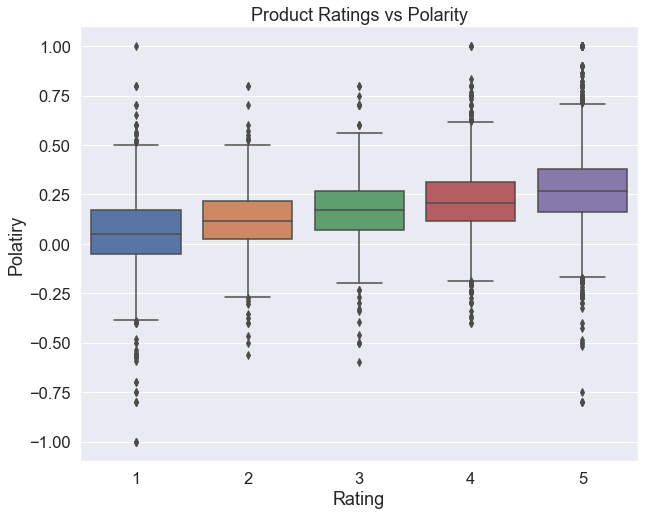

In [414]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'rating', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Product Ratings vs Polarity")
plt.show()

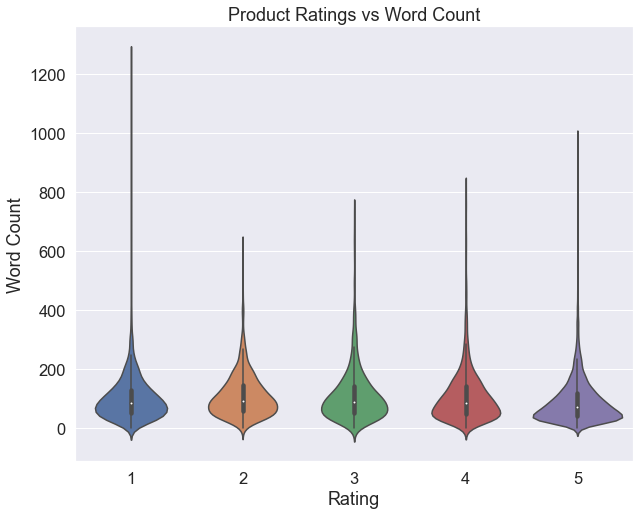

In [415]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.violinplot(x = 'rating', y = 'word_count', data = df)
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.title("Product Ratings vs Word Count")
plt.show()